I used <https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/34608> discussion board on kaggle while preparing data schema file. Any data file that does not follow this schema will be discarded as bad data.

Though the information given was helpful, but i wasn't sure the resource is reliable. This could be one of many situations where a discussion with domain expert or a colleague would help to make a choice and justify it. I shall continue EDA with schema menstioned above.

### Data Description:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 24 variables as explanatory variables:

**ID:** ID of each customer
**LIMIT_BAL:** Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

**SEX:** Gender (1 = male; 2 = female).

**EDUCATION:** Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).

**MARRIAGE:** Marital status (1 = married; 2 = single; 3 = divorce; 0=others).

**AGE:** Age (year).

**PAY_0, PAY_2 TO PAY_6:** History of past payment. 
We tracked the past monthly payment records (from April to September, 2005) as follows:
    
 *  **PAY_0** = the repayment status in September, 2005; 
 - **PAY_2** = the repayment status in August, 2005;
 - **PAY_3** = the repayment status in July, 2005; 
 - **PAY_4** = the repayment status in June, 2005;
 - **PAY_5** = the repayment status in May, 2005; 
 - **PAY_6** = the repayment status in April, 2005. 

 The measurement scale for the repayment status is:

   - -2: No consumption; 
   - -1: Paid in full; 
   - 0: The use of revolving credit; 
   - 1 = payment delay for one month; 
   - 2 = payment delay for two months; 
   - .
   - .    
   - .   
   - 8 = payment delay for eight months; 
   - 9 = payment delay for nine months and above.
    

**BILL_AMT1 TO BILL_AMT6:** Amount of bill statement (NT dollar). 

 - **BILL_AMT1** = amount of bill statement in September, 2005; 
 - **BILL_AMT2** = amount of bill statement in August, 2005; 
 - **BILL_AMT3** = amount of bill statement in July, 2005; 
 - **BILL_AMT4** = amount of bill statement in June, 2005;          
 - **BILL_AMT5** = amount of bill statement in May, 2005; 
 - **BILL_AMT6** = amount of bill statement in April, 2005.


**PAY_AMT1 TO PAY_AMT6:** Amount of previous payment (NT dollar). 
 - **PAY_AMT1** = amount paid in September, 2005; 
 - **PAY_AMT2** = amount paid in August, 2005;
 - **PAY_AMT3** = amount paid in July, 2005; 
 - **PAY_AMT4** = amount paid in June, 2005;
 - **PAY_AMT5** = amount paid in May, 2005; 
 - **PAY_AMT6** = amount paid in April, 2005.

**default payment next month:** =0 then not default, =1 then default"

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 30)

In [11]:
f_name = r".\artifact\data_ingestion\20221124_023719\data\CreditCard.xls"

In [12]:
df = pd.read_excel(f_name, header=1)

In [13]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
df["default payment next month"].value_counts(normalize = True)*100

0    77.88
1    22.12
Name: default payment next month, dtype: float64

### Observation:

This is an imbalanced Dataset
1. Shall use stratified shuffle split
2. Synthesize data

In [15]:
train_file_path = r".\artifact\data_validation\20221124_023719\good_data\creditCardTrain_20221124_023719.csv"
test_file_path = r".\artifact\data_ingestion\20221124_023719\ingested_data\test\creditCardfTest_20221124_023719.csv"

In [16]:
train_df = pd.read_csv(train_file_path)

In [17]:
df_train = train_df.copy()

In [18]:
df_train.shape

(24000, 25)

In [19]:
df_train.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
ID,24000.0,15017.086500,8676.004048,1.0,7464.50,15045.5,22526.25,30000.0
LIMIT_BAL,24000.0,167687.903333,129974.691354,10000.0,50000.00,140000.0,240000.00,800000.0
SEX,24000.0,1.602208,0.489452,1.0,1.00,2.0,2.00,2.0
EDUCATION,24000.0,1.856292,0.798488,0.0,1.00,2.0,2.00,6.0
MARRIAGE,24000.0,1.550625,0.520847,0.0,1.00,2.0,2.00,3.0
AGE,24000.0,35.432042,9.206171,21.0,28.00,34.0,41.00,79.0
PAY_0,24000.0,-0.018833,1.122214,-2.0,-1.00,0.0,0.00,8.0
PAY_2,24000.0,-0.135833,1.195453,-2.0,-1.00,0.0,0.00,8.0
PAY_3,24000.0,-0.168000,1.195722,-2.0,-1.00,0.0,0.00,8.0
PAY_4,24000.0,-0.220625,1.173282,-2.0,-1.00,0.0,0.00,8.0


Negative bill amounts could be because of merchant refunds or overpayments.

### 1. Check for Null values.

In [20]:
print(df_train.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


### 2. Check for Duplicate Data

In [21]:
df_train.duplicated().sum()

0

### Observation:

1. Dataset does not contain null values.
2. No duplicate values.

In [22]:
#rename columns for convenience
df_train.rename(columns = {'PAY_0': 'PAY_1', 'default payment next month': 'Default'}, inplace=True)
df_train.columns = [col.lower() for col in df_train.columns]


In [23]:
df_train.head()

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,28022,400000,2,1,2,29,-1,-1,0,0,0,0,5567,13011,22396,26359,41627,16709,13011,10001,5023,20150,5082,4134,0
1,13496,420000,1,2,2,39,0,0,0,0,0,0,204984,209929,190689,173547,176980,180109,8006,7000,6000,6500,6500,10000,0
2,26688,50000,1,1,2,25,2,0,0,0,0,0,48966,49985,50760,49535,30358,30302,2130,1905,1811,1100,1100,1200,0
3,11742,180000,1,2,1,26,-1,-1,-1,-1,-1,-1,396,396,396,396,396,396,396,396,396,396,396,396,0
4,16079,300000,2,3,2,30,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1


In [24]:
categorical_features = ['sex', 'education', 'marriage', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
for col in categorical_features:
    print(col, "==>", df_train[col].unique())

sex ==> [2 1]
education ==> [1 2 3 6 4 5 0]
marriage ==> [2 1 3 0]
pay_1 ==> [-1  0  2 -2  1  3  4  8  7  5  6]
pay_2 ==> [-1  0 -2  2  3  5  4  1  7  6  8]
pay_3 ==> [ 0 -1 -2  2  4  3  7  5  1  6  8]
pay_4 ==> [ 0 -1 -2  3  2  4  7  5  1  6  8]
pay_5 ==> [ 0 -1 -2  2  3  7  4  5  8  6]
pay_6 ==> [ 0 -1 -2  2  3  7  4  8  5  6]


According to data schema, in 'education' column
0,4,5,6 = other.

In [25]:
#custom imputer for education column. similar transformation will also be applied on test data.
from sklearn.impute import SimpleImputer
class EducationImputer(SimpleImputer):
    """
    This class imputes the values in education column
    returns pd.Series
    """
    def __init__(self, missing_values=None, col_name='education', strategy="constant", fill_value=4):
        super().__init__( missing_values, strategy, fill_value)
        self.col_name = col_name

    def fit(self,X):
        self.features_ = X[self.col_name]
        self.statistic_=[self.fill_value]
        self.statistic_.append(self.fill_value)
        
    def transform(self, X:pd.DataFrame):
        X[self.col_name].replace([0, 5, 6], 4, inplace=True)
        return X[self.col_name]

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [26]:
edu_impute = EducationImputer()
df_train['education'] = edu_impute.fit_transform(df_train)

C:\Users\User\anaconda31\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass missing_values=None, strategy=constant, fill_value=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [27]:
df_train['education'].unique()
df_train.head()

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,28022,400000,2,1,2,29,-1,-1,0,0,0,0,5567,13011,22396,26359,41627,16709,13011,10001,5023,20150,5082,4134,0
1,13496,420000,1,2,2,39,0,0,0,0,0,0,204984,209929,190689,173547,176980,180109,8006,7000,6000,6500,6500,10000,0
2,26688,50000,1,1,2,25,2,0,0,0,0,0,48966,49985,50760,49535,30358,30302,2130,1905,1811,1100,1100,1200,0
3,11742,180000,1,2,1,26,-1,-1,-1,-1,-1,-1,396,396,396,396,396,396,396,396,396,396,396,396,0
4,16079,300000,2,3,2,30,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
#drop id column. similar transformation will be applied on test data.
def drop_col(df:pd.DataFrame, col:str)->pd.DataFrame:
    """
    This method drops given column col from dataframe df
    Output: pd.DataFrame
    """
    df.drop(columns=col, inplace=True)
    return df

In [29]:
#drop column id
drop_col(df_train, 'id')
df_train.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,400000,2,1,2,29,-1,-1,0,0,0,0,5567,13011,22396,26359,41627,16709,13011,10001,5023,20150,5082,4134,0
1,420000,1,2,2,39,0,0,0,0,0,0,204984,209929,190689,173547,176980,180109,8006,7000,6000,6500,6500,10000,0
2,50000,1,1,2,25,2,0,0,0,0,0,48966,49985,50760,49535,30358,30302,2130,1905,1811,1100,1100,1200,0
3,180000,1,2,1,26,-1,-1,-1,-1,-1,-1,396,396,396,396,396,396,396,396,396,396,396,396,0
4,300000,2,3,2,30,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1


### Exploratory Data Analysis

In [30]:
from collections import Counter
c = Counter(df_train['default'])
for cls, val in c.most_common(2):
    print ("Class = ", cls, " No. of instances = ", val, " Proportion = ", np.round(val/len(df_train)*100, 2), "%")


Class =  0  No. of instances =  18691  Proportion =  77.88 %
Class =  1  No. of instances =  5309  Proportion =  22.12 %


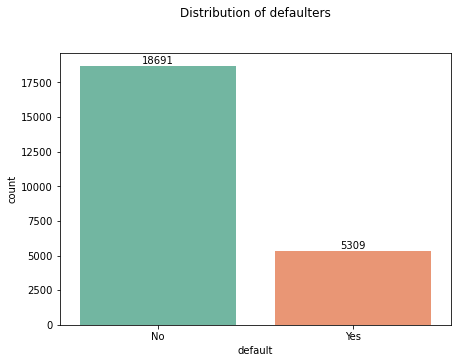

In [31]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='default', data=df_train, palette='Set2')
plt.title("Distribution of defaulters\n\n")
plt.xticks((0,1), labels=['No', 'Yes'])
ax.bar_label(ax.containers[0])
plt.show()

In [32]:
def plot_ipfeature_with_target_feature(df_train, col, target_col):
    
    
    col_vc = df_train[col].value_counts(normalize=True)
    col_vc = col_vc[sorted(col_vc.index)]
    ax0_label=np.round(col_vc.values*100, 2)
    
    col_ct = pd.crosstab(df_train[col], df_train[target_col], normalize=True)
    ax1_label = np.ravel(np.round(col_ct.values*100, 2),
                         order='F')

    ax1_plabel = []
    ax0_plabel = []
    for i in ax0_label:
        ax0_plabel.append('{:.2f}%'.format(i))
    for i in ax1_label:
        ax1_plabel.append('{:.2f}%'.format(i))

    
    fig = plt.figure(figsize=(14, 5))
    ax0 = fig.add_subplot(121)
    sns.countplot(x=col, data= df_train, palette='pastel', ax=ax0, order=sorted(col_vc.index))
    for p, label in zip(ax0.patches, ax0_plabel ):
        ax0.annotate(label, (p.get_x()+0.375, p.get_height()+100))
    plt.title(f"Distribution of {col}\n\n")


    ax1 = fig.add_subplot(122)
    sns.countplot(x=col, hue=target_col, data=df_train, palette='Set3', ax=ax1, order=sorted(col_vc.index))
    for p, label in zip(ax1.patches, ax1_plabel):
        ax1.annotate(label, (p.get_x()+0.375, p.get_height()+100), rotation=90 )
    plt.title(f"{col} column distribution w.r.t default column\n\n")

    plt.show()
    
    print("Proportion of defaulters within sub-category\n")
    print(pd.crosstab(df_train[target_col], df_train[col], normalize='columns'))

In [41]:
df_cat_corr = df_train[['default','sex','education','marriage',]].corr()
df_cat_corr[(df_cat_corr>0.5)]

,default,sex,education,marriage
default,1.0,NaN,NaN,NaN
sex,NaN,1.0,NaN,NaN
education,NaN,NaN,1.0,NaN
marriage,NaN,NaN,NaN,1.0


In [42]:
#replacing feature labels for convenience
df_train.replace({'sex': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df_train.replace({'education' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others',5: "Others", 6: "Others",0: "Others"}}, inplace=True)
df_train.replace({'marriage' : {1 : 'Married', 2 : 'Single', 3 : 'Divorced', 0:'Others'}}, inplace = True)
df_train.replace({'default' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

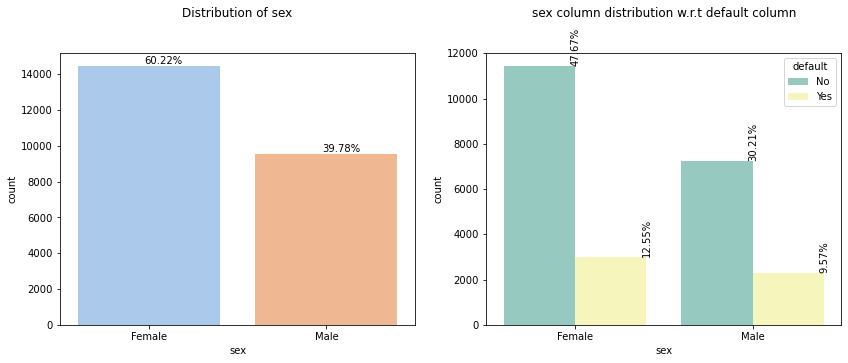

Proportion of defaulters within sub-category

sex        Female      Male
default                    
No       0.791531  0.759506
Yes      0.208469  0.240494


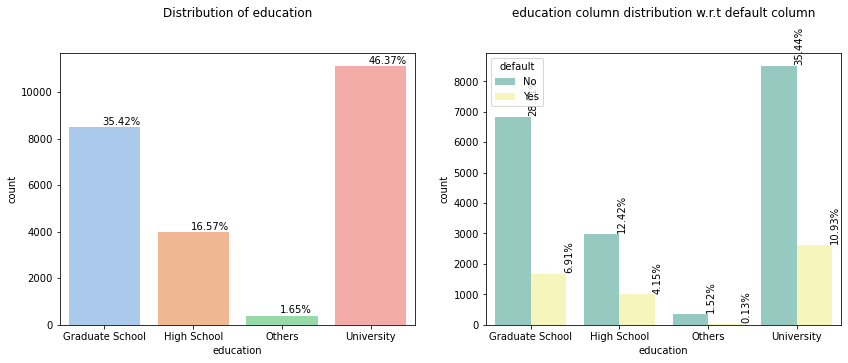

Proportion of defaulters within sub-category

education  Graduate School  High School    Others  University
default                                                      
No                0.804846     0.749497  0.921519    0.764288
Yes               0.195154     0.250503  0.078481    0.235712


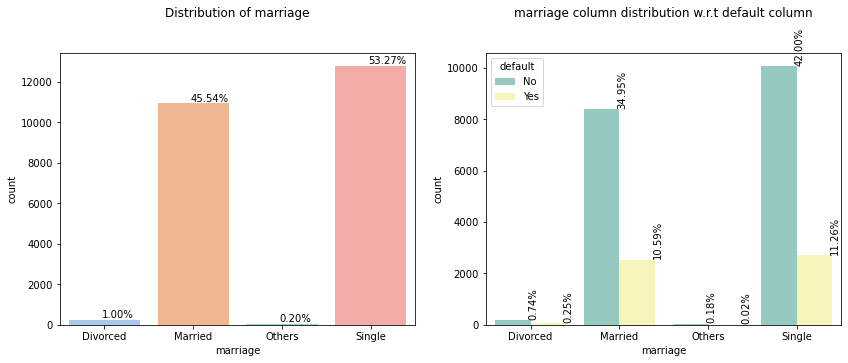

Proportion of defaulters within sub-category

marriage  Divorced   Married    Others    Single
default                                         
No         0.74477  0.767521  0.914894  0.788564
Yes        0.25523  0.232479  0.085106  0.211436


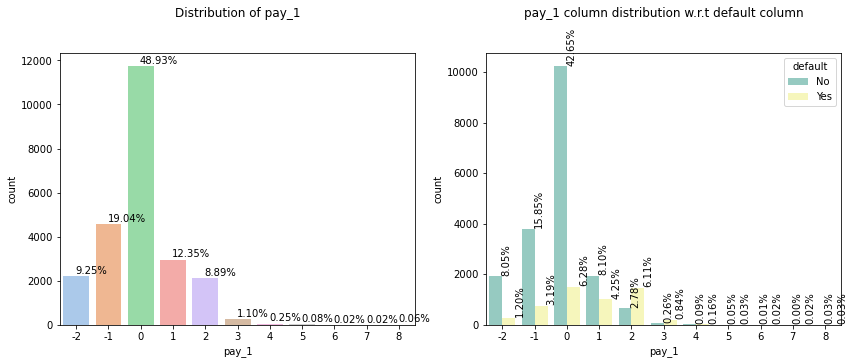

Proportion of defaulters within sub-category

pay_1          -2        -1         0         1         2         3         4  \
default                                                                         
No       0.870212  0.832604  0.871679  0.656208  0.312705  0.238636  0.355932   
Yes      0.129788  0.167396  0.128321  0.343792  0.687295  0.761364  0.644068   

pay_1      5         6         7         8  
default                                     
No       0.6  0.333333  0.166667  0.466667  
Yes      0.4  0.666667  0.833333  0.533333  


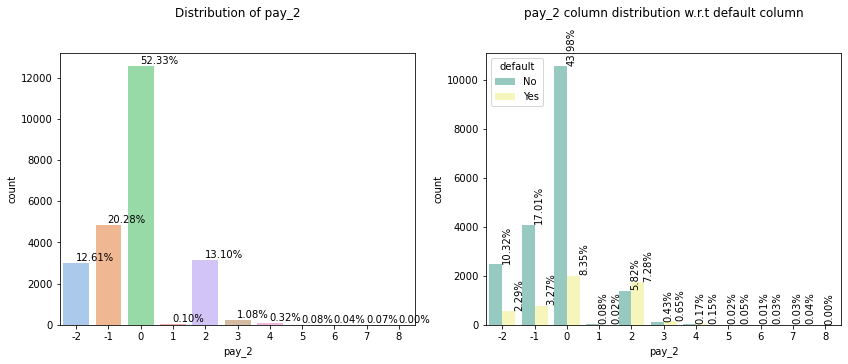

Proportion of defaulters within sub-category

pay_2          -2        -1         0    1         2         3         4  \
default                                                                    
No       0.818572  0.838882  0.840366  0.8  0.444338  0.397683  0.539474   
Yes      0.181428  0.161118  0.159634  0.2  0.555662  0.602317  0.460526   

pay_2           5         6       7    8  
default                                   
No       0.333333  0.222222  0.4375  1.0  
Yes      0.666667  0.777778  0.5625  0.0  


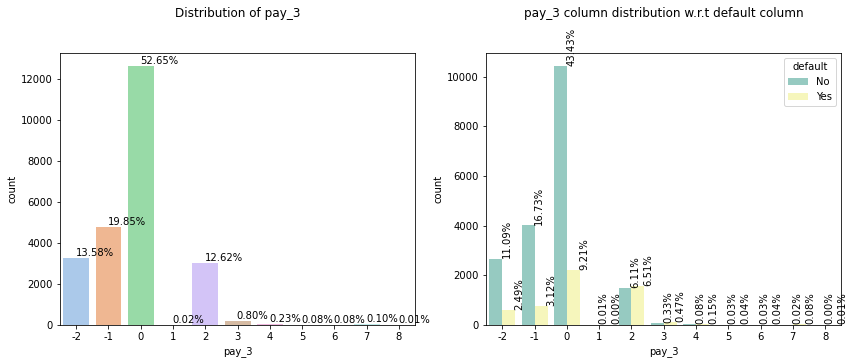

Proportion of defaulters within sub-category

pay_3          -2        -1        0     1         2         3         4  \
default                                                                    
No       0.816759  0.842779  0.82501  0.75  0.483988  0.416667  0.363636   
Yes      0.183241  0.157221  0.17499  0.25  0.516012  0.583333  0.636364   

pay_3           5         6         7         8  
default                                          
No       0.444444  0.444444  0.208333  0.333333  
Yes      0.555556  0.555556  0.791667  0.666667  


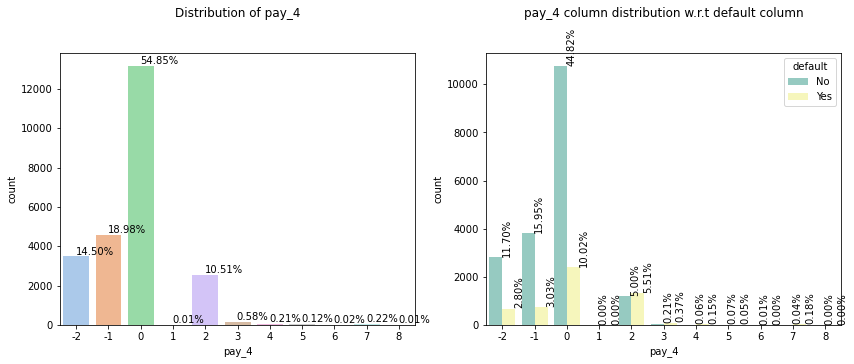

Proportion of defaulters within sub-category

pay_4          -2        -1         0    1         2         3         4  \
default                                                                    
No       0.807184  0.840176  0.817291  0.5  0.475624  0.366906  0.294118   
Yes      0.192816  0.159824  0.182709  0.5  0.524376  0.633094  0.705882   

pay_4           5     6         7    8  
default                                 
No       0.571429  0.75  0.188679  0.5  
Yes      0.428571  0.25  0.811321  0.5  


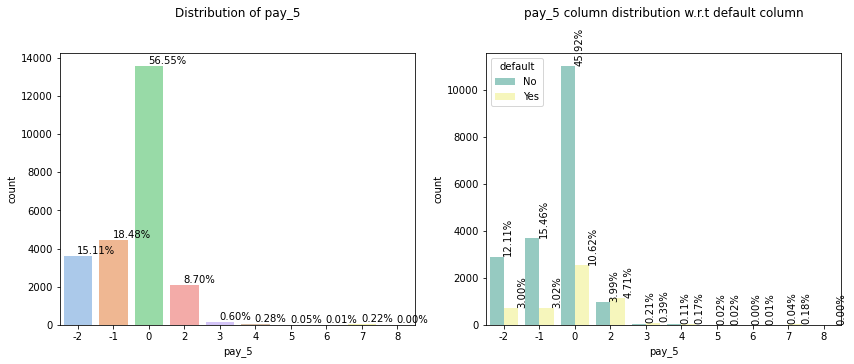

Proportion of defaulters within sub-category

pay_5         -2        -1         0         2         3         4         5  \
default                                                                        
No       0.80171  0.836528  0.812173  0.458333  0.351724  0.402985  0.545455   
Yes      0.19829  0.163472  0.187827  0.541667  0.648276  0.597015  0.454545   

pay_5           6         7    8  
default                           
No       0.333333  0.188679  0.0  
Yes      0.666667  0.811321  1.0  


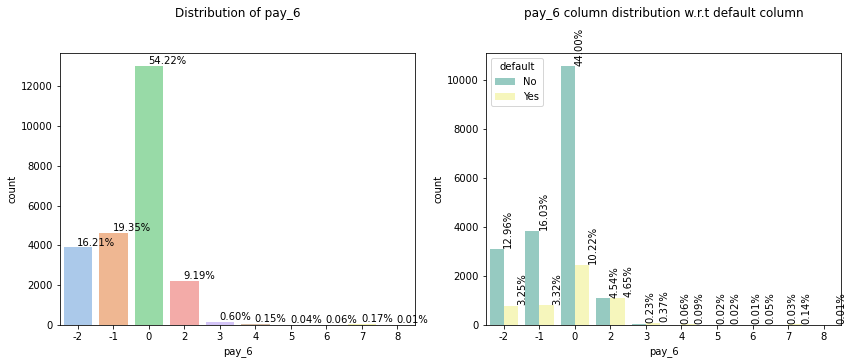

Proportion of defaulters within sub-category

pay_6         -2        -1         0         2         3         4         5  \
default                                                                        
No       0.79928  0.828559  0.811573  0.493654  0.386207  0.388889  0.444444   
Yes      0.20072  0.171441  0.188427  0.506346  0.613793  0.611111  0.555556   

pay_6           6         7    8  
default                           
No       0.142857  0.195122  0.0  
Yes      0.857143  0.804878  1.0  


In [43]:
#Is default proportion affected by gender
for col in categorical_features:
    plot_ipfeature_with_target_feature(df_train, col, 'default')

 - Although there are more female card holders, default proportion among men is more.  
 - I don't see any impact of education and marital status on default.
 - Customers who are using revolving credit and whose payments are delayed by two months are more likely to get default for credit card payment.

In [84]:
pay_columns = [col for col in df_train.columns[df_train.columns.str.startswith("pay_")]]
bill_amt_cols = [col for col in df_train.columns[df_train.columns.str.startswith("bill_amt")]]

In [50]:
pay_amt_columns = [col for col in df_train.columns[df_train.columns.str.startswith("pay_amt")]]

In [51]:
pay_cat_cols = [col for col in pay_columns if col not in pay_amt_columns ]

In [52]:
pay_cat_cols

['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

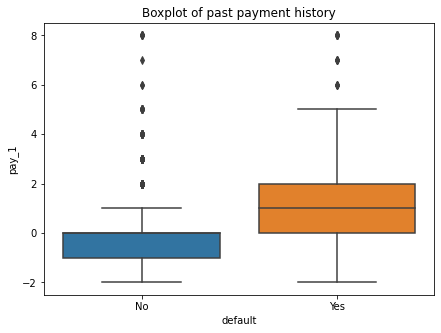

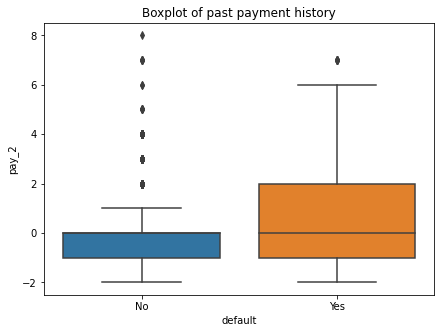

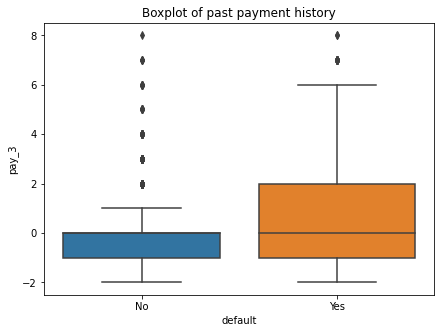

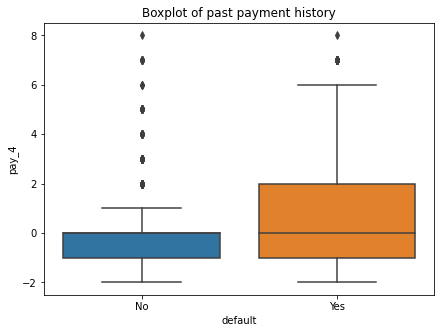

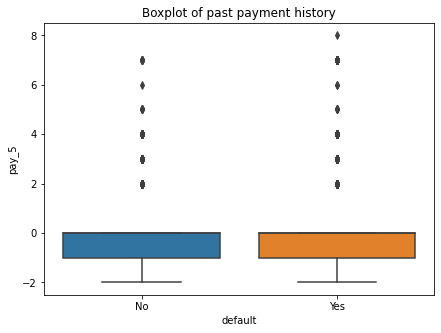

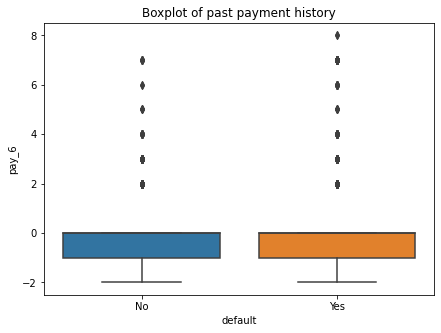

In [83]:

for i,col in enumerate(pay_cat_cols, start=1):
    plt.figure(figsize=(7,5))
    sns.boxplot(x='default', y=col, data=df_train)
    plt.title("Boxplot of past payment history")
    plt.show()

People using revolving credit and past payments due upto 2 months are more likely to default in payment.

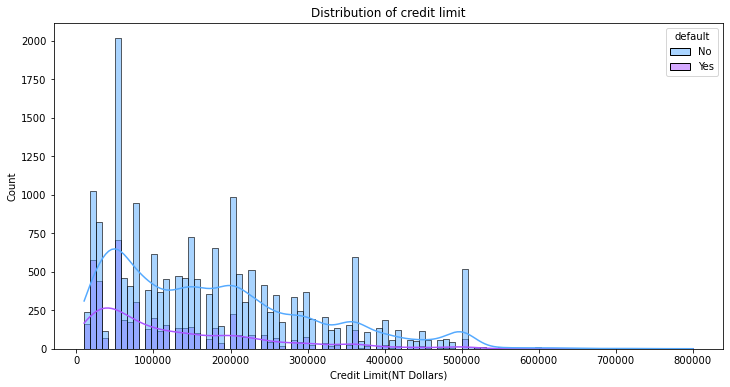

In [139]:
#Checking distribution of limit balance
plt.figure(figsize=(12,6))
sns.histplot(data=df_train, x='limit_bal',hue='default', kde=True, bins=100, palette='cool')
plt.xlabel("Credit Limit(NT Dollars)")
plt.title("Distribution of credit limit")
plt.show()

People with higher credit limits have significantly lower default proportion. People might have higher credit limit may be because of their good credit history.

In [137]:
df_train['age_group'] = pd.cut(df_train['age'], bins=[21,31,41,51,61,71, 81], right=False, 
                                   labels=['20s', '30s', '40s', '50s', '60s', '70s'])

<Figure size 720x504 with 0 Axes>

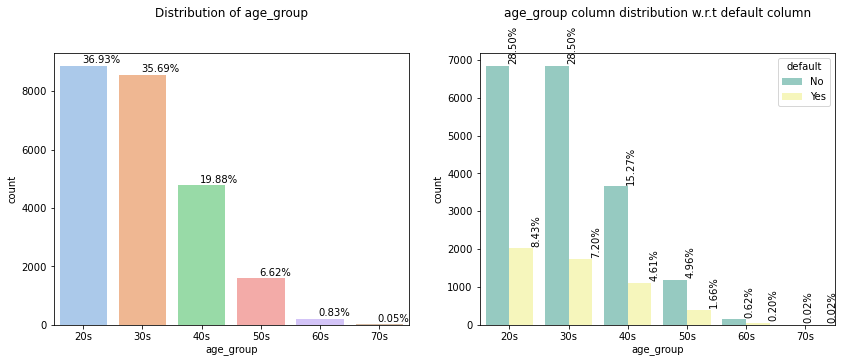

Proportion of defaulters within sub-category

age_group       20s       30s       40s       50s       60s       70s
default                                                              
No         0.771861  0.798389  0.767973  0.749057  0.753769  0.545455
Yes        0.228139  0.201611  0.232027  0.250943  0.246231  0.454545


In [138]:
plt.figure(figsize=(10,7))
#sns.countplot(x='age_group', hue='default',  data=df_train)
plot_ipfeature_with_target_feature(df_train, 'age_group', 'default')

### Correlation between FEATURES

Text(0.5, 1.0, 'Correlation Matrix')

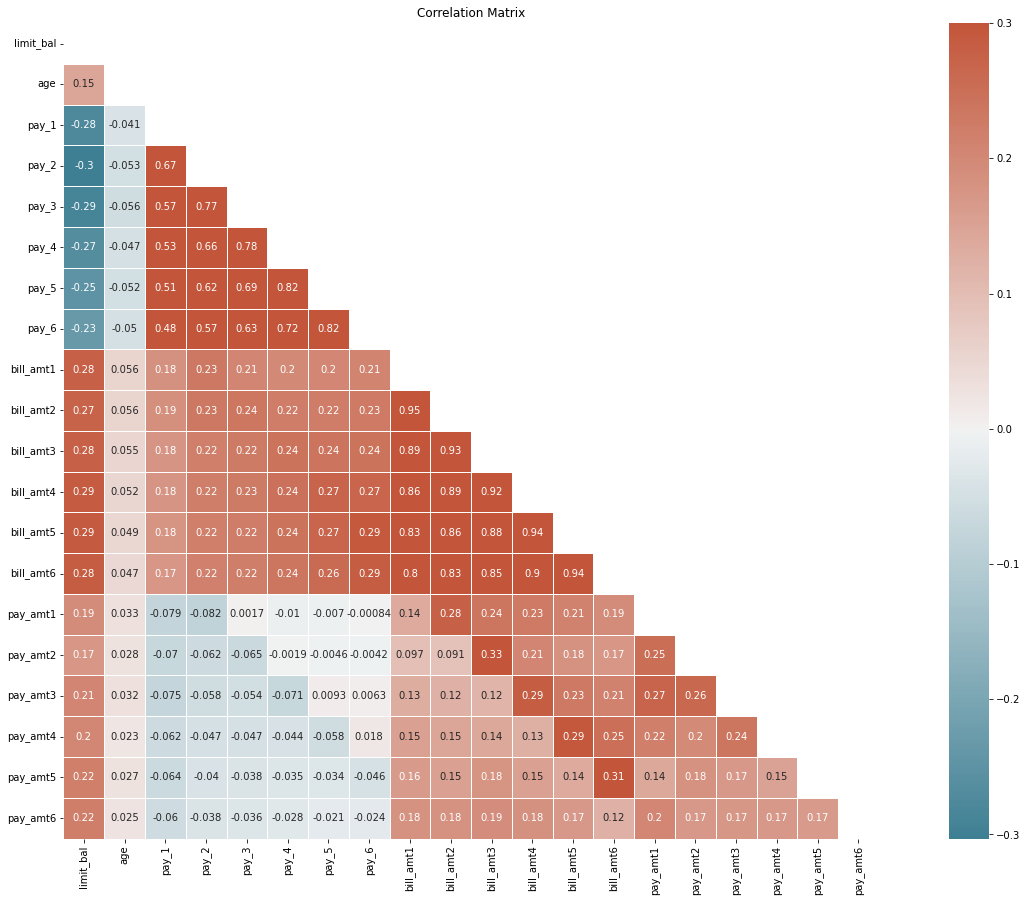

In [144]:
#Correlation matrix for all variables
corr = df_train.drop('default', axis=1).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(25, 15))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, cmap= cmap, linewidth=.5)
ax.set_title("Correlation Matrix")

bill amounts are highly correlated, so as past payment history

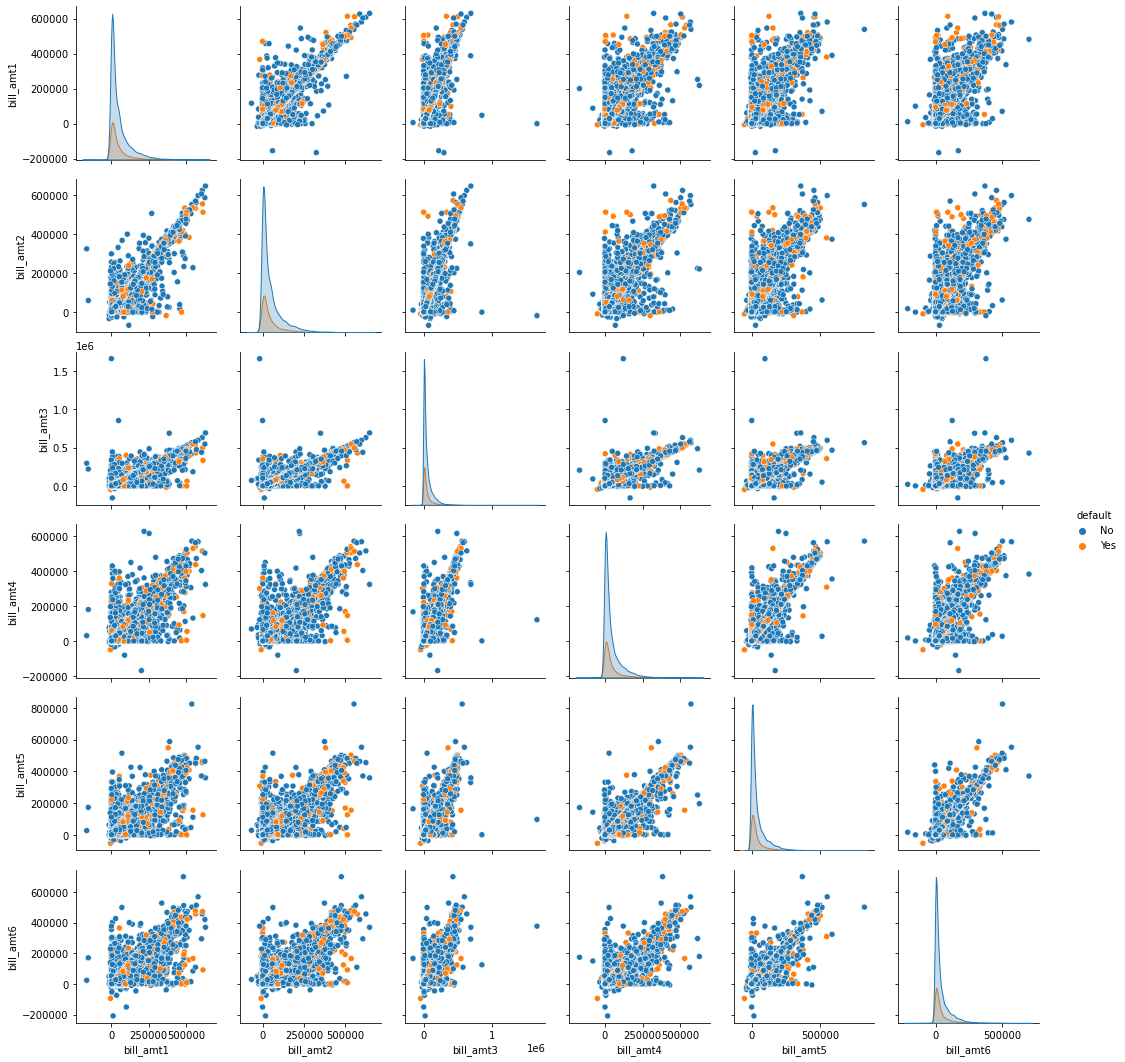

In [146]:
sns.pairplot(df_train, vars=df_train[bill_amt_cols], hue='default', )

the distribution of bill amounts is skewed. While training, if model requires symmetric distribution, a log transformation or a box cox transformation can be used.

I shall be using RobustScaler to normalize data because of presence of outliers.

###  Feature Engineering

In [150]:
df_train.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default',
       'age_group'],
      dtype='object')

In [160]:
df_train['avg_bill_amt'] = np.round(df_train[bill_amt_cols].sum(axis=1)/6, 2)
df_train['avg_pay_amt'] = np.round(df_train[pay_amt_columns].sum(axis=1)/6, 2)
df_train['avg_pay_hist'] = np.round(df_train[pay_cat_cols].sum(axis=1)/6, 2)

In [161]:
df_train.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,age_group,avg_bill_amt,avg_pay_amt,avg_pay_hist
0,400000,Female,Graduate School,Single,29,-1,-1,0,0,0,0,5567,13011,22396,26359,41627,16709,13011,10001,5023,20150,5082,4134,No,20s,20944.83,9566.83,-0.33
1,420000,Male,University,Single,39,0,0,0,0,0,0,204984,209929,190689,173547,176980,180109,8006,7000,6000,6500,6500,10000,No,30s,189373.00,7334.33,0.00
2,50000,Male,Graduate School,Single,25,2,0,0,0,0,0,48966,49985,50760,49535,30358,30302,2130,1905,1811,1100,1100,1200,No,20s,43317.67,1541.00,0.33
3,180000,Male,University,Married,26,-1,-1,-1,-1,-1,-1,396,396,396,396,396,396,396,396,396,396,396,396,No,20s,396.00,396.00,-1.00
4,300000,Female,High School,Single,30,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,Yes,20s,0.00,0.00,-2.00


In [173]:
df_train.loc[df_train['avg_bill_amt']>df_train['limit_bal']]['default'].value_counts()

No     342
Yes    176
Name: default, dtype: int64

In [176]:
df_train['overdraft'] = np.where((df_train['bill_amt1']>df_train['limit_bal']) |
                                 (df_train['bill_amt2']>df_train['limit_bal']) |
                                 (df_train['bill_amt3']>df_train['limit_bal']) |
                                 (df_train['bill_amt4']>df_train['limit_bal']) |
                                 (df_train['bill_amt5']>df_train['limit_bal']),
                                 1, 0                                 
                                )

In [181]:
df_train[df_train['overdraft']==1]['default'].value_counts(normalize=True)

No     0.695491
Yes    0.304509
Name: default, dtype: float64

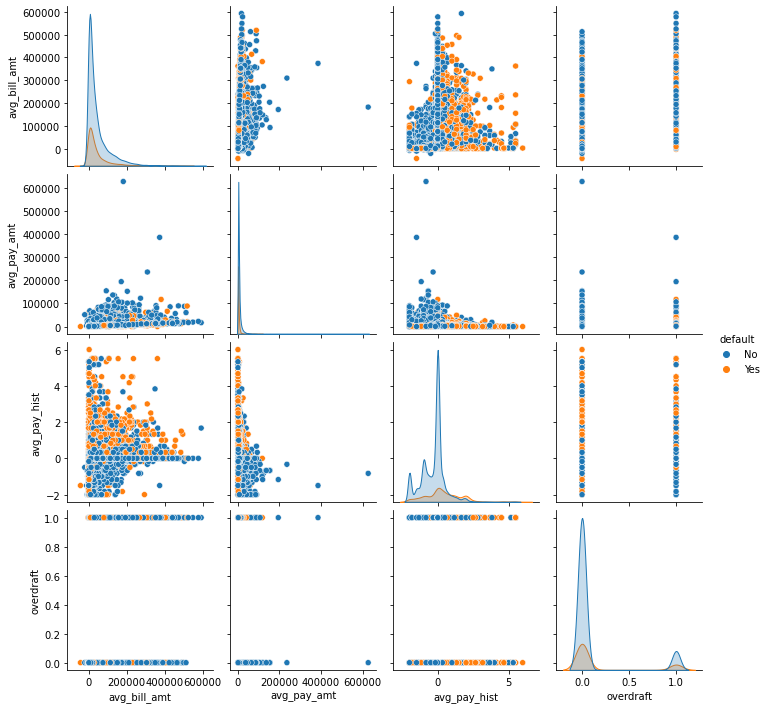

In [185]:
sns.pairplot(df_train, vars=['avg_bill_amt', 'avg_pay_amt', 'avg_pay_hist', 'overdraft'], hue='default')